<a href="https://colab.research.google.com/github/Python-Is-Long/Teaching/blob/main/Stock_price_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020-7-11

In [ ]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=554181ce4f7158179887cb870c70bcf7172de07a99df68a3422bfe14392bb90d
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from IPython.display import display
variables = locals()

# Get stock data

In [ ]:
%%time
dict_df = {}
list_stock = ["TSLA", "FB", "NVDA"]
for stock in list_stock:
  dict_df[stock] = yf.download(
      stock, 
      start='2019-01-01', 
      end='2020-7-11', 
      progress=False)


CPU times: user 177 ms, sys: 24.5 ms, total: 202 ms
Wall time: 433 ms


In [ ]:
dict_df

{'FB':                   Open        High  ...   Adj Close    Volume
 Date                                ...                      
 2019-01-02  128.990005  137.509995  ...  135.679993  28146200
 2019-01-03  134.690002  137.169998  ...  131.740005  22717900
 2019-01-04  134.009995  138.000000  ...  137.949997  29002100
 2019-01-07  137.559998  138.869995  ...  138.050003  20089300
 2019-01-08  139.889999  143.139999  ...  142.529999  26263800
 ...                ...         ...  ...         ...       ...
 2020-07-06  233.759995  240.399994  ...  240.279999  26206200
 2020-07-07  239.410004  247.649994  ...  240.860001  27887800
 2020-07-08  238.110001  246.990005  ...  243.580002  29791300
 2020-07-09  245.000000  246.529999  ...  244.500000  22174900
 2020-07-10  243.690002  245.490005  ...  245.070007  22982700
 
 [384 rows x 6 columns],
 'NVDA':                   Open        High  ...   Adj Close    Volume
 Date                                ...                      
 2019-01-02  1

# Show stock data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600
2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200
2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100
2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200
2019-01-08,341.959991,344.010010,327.019989,335.350006,335.350006,7008500
...,...,...,...,...,...,...
2020-07-06,1276.689941,1377.790039,1266.040039,1371.579956,1371.579956,20569900
2020-07-07,1405.010010,1429.500000,1336.709961,1389.859985,1389.859985,21489700
2020-07-08,1405.000000,1417.260010,1311.339966,1365.880005,1365.880005,16311300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800
...,...,...,...,...,...,...
2020-07-06,233.759995,240.399994,232.270004,240.279999,240.279999,26206200
2020-07-07,239.410004,247.649994,238.820007,240.860001,240.860001,27887800
2020-07-08,238.110001,246.990005,236.589996,243.580002,243.580002,29791300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,130.639999,138.479996,130.050003,136.220001,135.547104,12718800
2019-01-03,133.789993,135.160004,127.690002,127.989998,127.357750,17638800
2019-01-04,130.940002,137.729996,129.699997,136.190002,135.517258,14640500
2019-01-07,138.500000,144.889999,136.429993,143.399994,142.691620,17729000
2019-01-08,146.690002,146.779999,136.899994,139.830002,139.139282,19650400
...,...,...,...,...,...,...
2020-07-06,389.670013,396.350006,388.500000,393.570007,393.570007,7897300
2020-07-07,397.850006,402.799988,394.029999,394.869995,394.869995,8945000
2020-07-08,399.750000,409.000000,398.619995,408.640015,408.640015,9137000


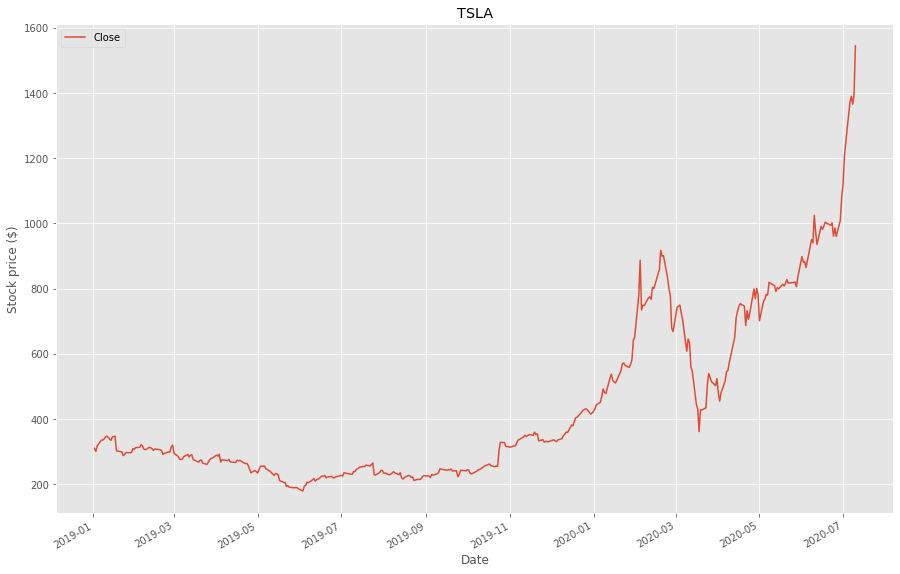

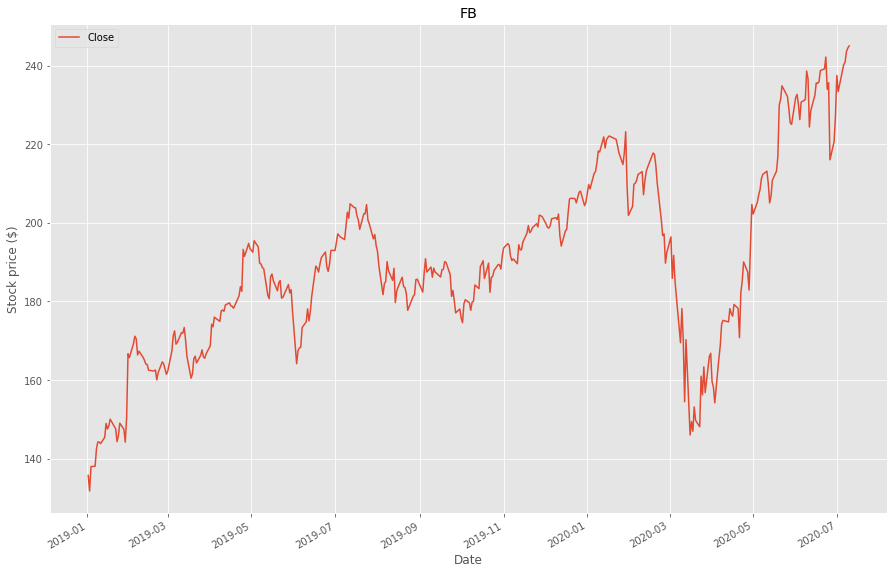

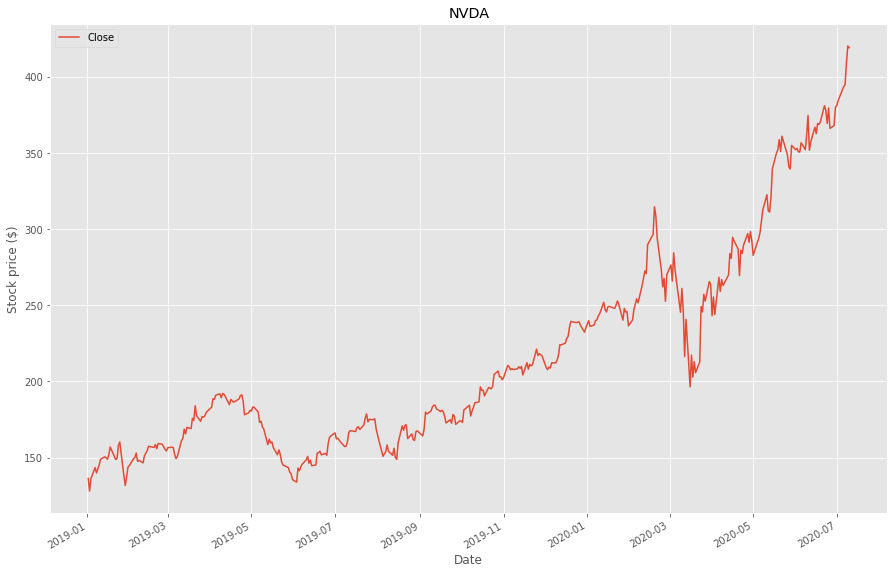

In [ ]:
for key, df in dict_df.items():
  display(df)
  ax = df[["Close"]].plot(figsize=(15,10), title=key)
  ax.set_ylabel("Stock price ($)")
  plt.gcf().set_facecolor("w")

# Auto correlation

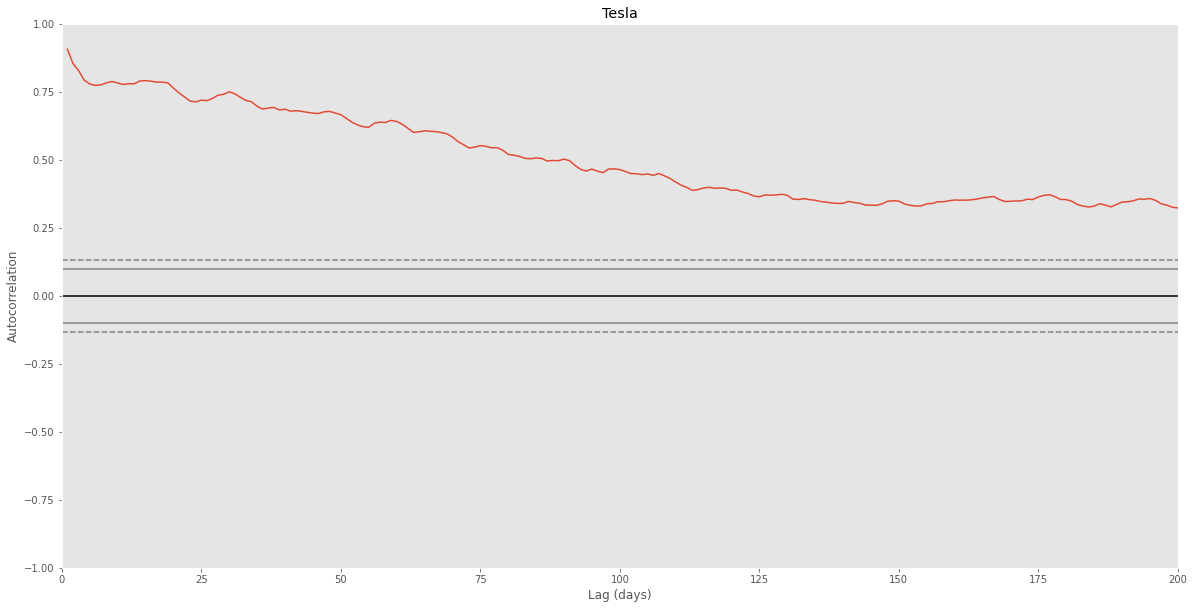

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,10))
ax = autocorrelation_plot(dict_df["TSLA"])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
plt.title("Tesla");
plt.gcf().savefig("Autocorrelation.png")

Autocorrelation subplots

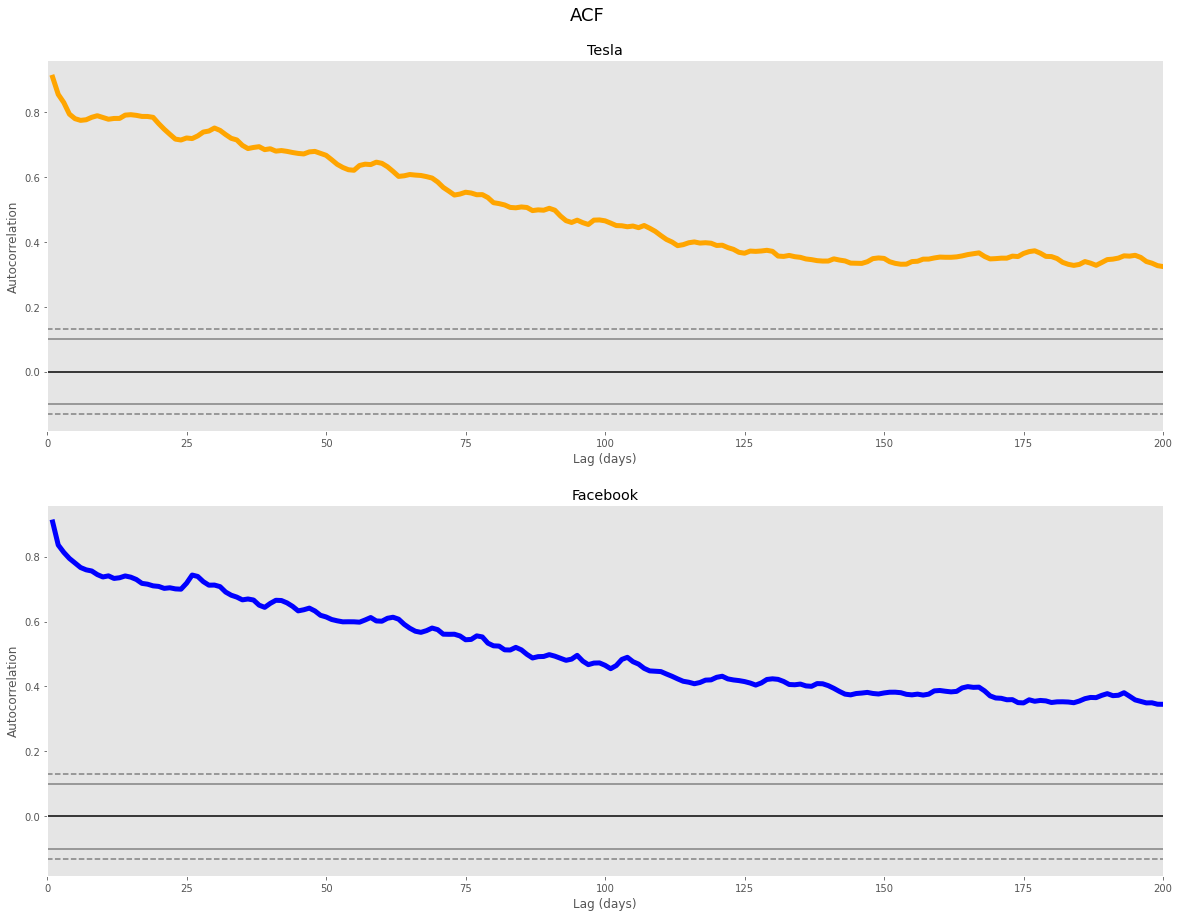

In [ ]:
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

ax = autocorrelation_plot(dict_df["TSLA"], c="orange", linewidth=5, ax=axes[0])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla");

ax = autocorrelation_plot(dict_df["FB"], c="blue", linewidth=5, ax=axes[1])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Facebook");

fig.suptitle("ACF", y=0.93, fontsize=18);
fig.savefig("Autocorrelation subplots.png")

## Exploring the properties of ACF

Reversing the time series won't affect autocorrelation

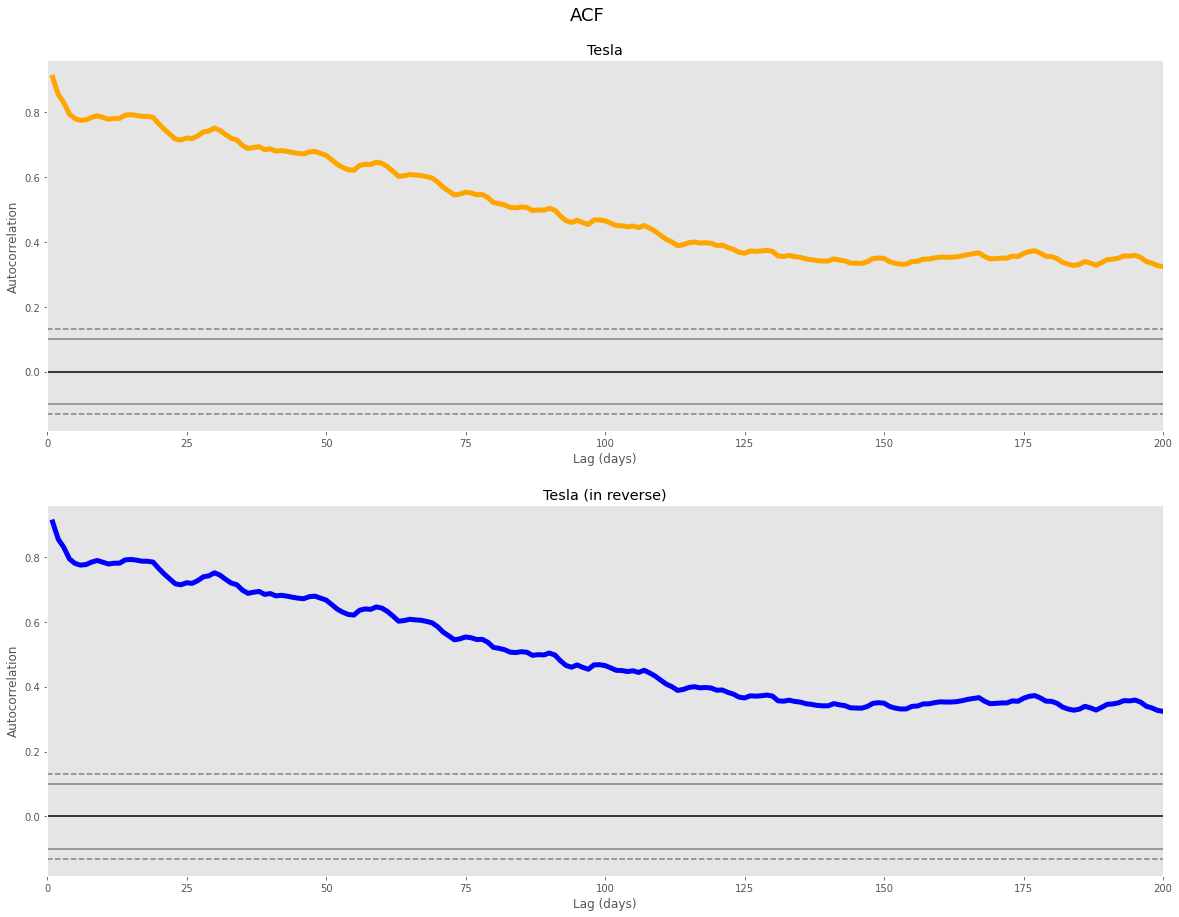

In [ ]:
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

ax = autocorrelation_plot(dict_df["TSLA"], c="orange", linewidth=5, ax=axes[0])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla");

ax = autocorrelation_plot(dict_df["TSLA"].iloc[::-1], c="blue", linewidth=5, ax=axes[1])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla (in reverse)");

fig.suptitle("ACF", y=0.93, fontsize=18);
fig.savefig("Autocorrelation subplots.png")

A subset of the time series won't have the same autcorrelation

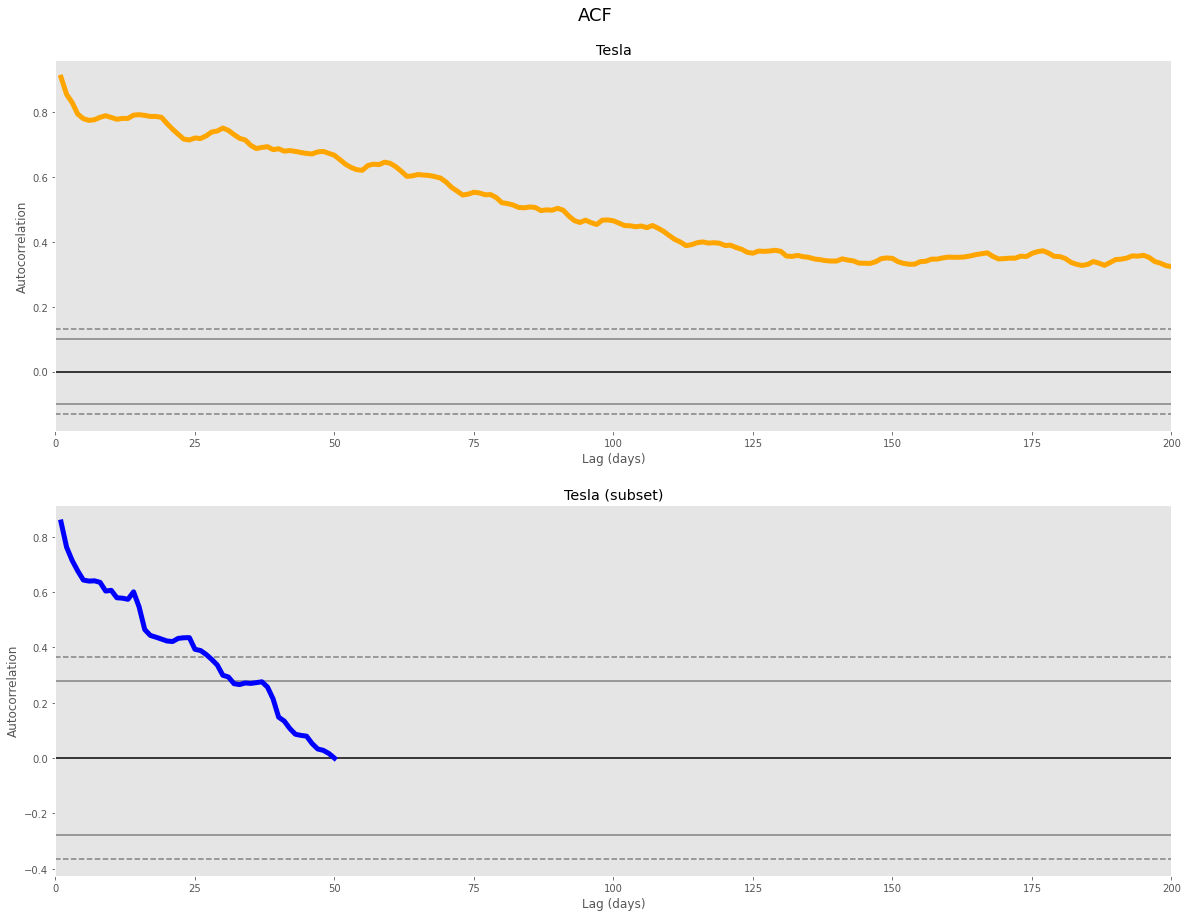

In [ ]:
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

ax = autocorrelation_plot(dict_df["TSLA"], c="orange", linewidth=5, ax=axes[0])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla");

ax = autocorrelation_plot(dict_df["TSLA"].iloc[30:80], c="blue", linewidth=5, ax=axes[1])
ax.set_xlim(0,200);
ax.set_xlabel("Lag (days)");
ax.set_title("Tesla (subset)");

fig.suptitle("ACF", y=0.93, fontsize=18);
fig.savefig("Autocorrelation subplots.png")

# Resampling

In [ ]:
dict_df["TSLA"].resample("M").asfreq()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,301.000000,311.559998,294.000000,307.019989,307.019989,12569200.0
2019-02-28,318.920013,320.000000,310.809998,319.880005,319.880005,10520700.0
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,242.059998,244.210007,237.000000,238.690002,238.690002,9464600.0
2019-05-31,185.100006,189.919998,184.100006,185.160004,185.160004,10406700.0
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,243.000000,246.679993,236.649994,241.610001,241.610001,9178200.0
2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,243.000000,243.979996,236.110001,240.869995,240.869995,5879800.0


In [ ]:
dict_df["TSLA"].resample("M").last()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,301.000000,311.559998,294.000000,307.019989,307.019989,12569200
2019-02-28,318.920013,320.000000,310.809998,319.880005,319.880005,10520700
2019-03-31,278.700012,280.160004,274.500000,279.859985,279.859985,5991300
2019-04-30,242.059998,244.210007,237.000000,238.690002,238.690002,9464600
2019-05-31,185.100006,189.919998,184.100006,185.160004,185.160004,10406700
2019-06-30,220.990005,225.169998,220.800003,223.460007,223.460007,6851400
2019-07-31,243.000000,246.679993,236.649994,241.610001,241.610001,9178200
2019-08-31,229.149994,232.440002,224.210007,225.610001,225.610001,9320600
2019-09-30,243.000000,243.979996,236.110001,240.869995,240.869995,5879800


In [ ]:
dict_df["TSLA"].last("1M")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,1083.000000,1135.329956,1080.500000,1119.630005,1119.630005,13326900
2020-07-02,1221.479980,1228.000000,1185.599976,1208.660034,1208.660034,17250100
2020-07-06,1276.689941,1377.790039,1266.040039,1371.579956,1371.579956,20569900
2020-07-07,1405.010010,1429.500000,1336.709961,1389.859985,1389.859985,21489700
2020-07-08,1405.000000,1417.260010,1311.339966,1365.880005,1365.880005,16311300
2020-07-09,1396.989990,1408.560059,1351.280029,1394.280029,1394.280029,11717600
2020-07-10,1396.000000,1548.920044,1376.010010,1544.650024,1544.650024,23337600


⚠ Caution: 

asfreq() could contain NaN, so it won't show in the autocorrelation plot.

resample().last() will not contain NaN, so this is shown in the autocorrelation plot.

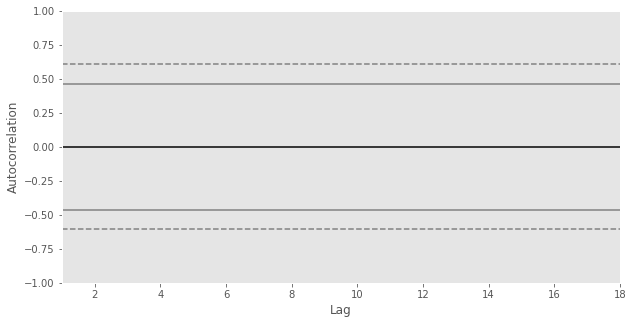

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
ax = autocorrelation_plot(dict_df["TSLA"].asfreq("M"))

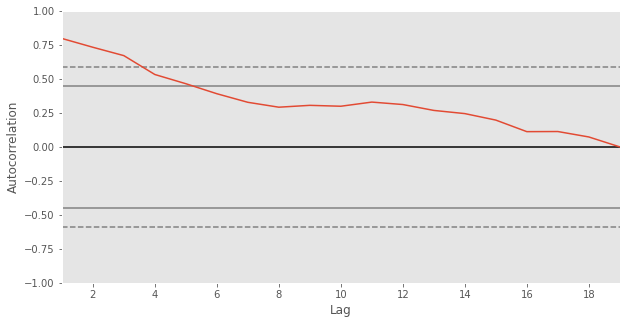

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
ax = autocorrelation_plot(dict_df["TSLA"].resample("M").last())